#### LPF_orden-3

<IPython.core.display.Math object>

#### LPF_orden-3

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Singularidades LPF Butterwoth
Polos: [-0.31322824+1.02192749j -0.62645649-0.j         -0.31322824-1.02192749j]
Ceros: []
Singularidades BPF Butterworth
Polos: [-0.03450874+1.10691778j -0.03450874-1.10691778j -0.06264565+0.99803583j
 -0.06264565-0.99803583j -0.02813691+0.90253228j -0.02813691-0.90253228j]
Ceros: [0. 0. 0.]


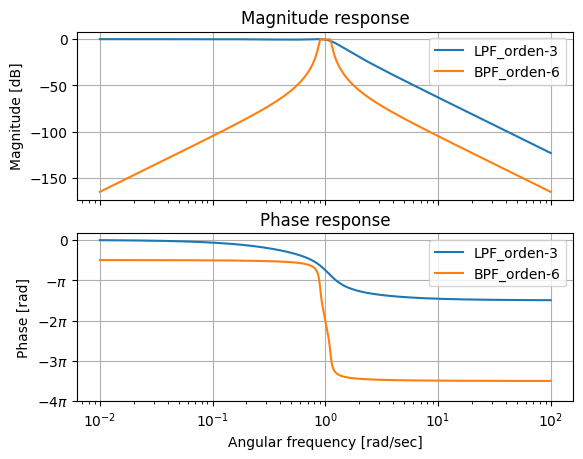

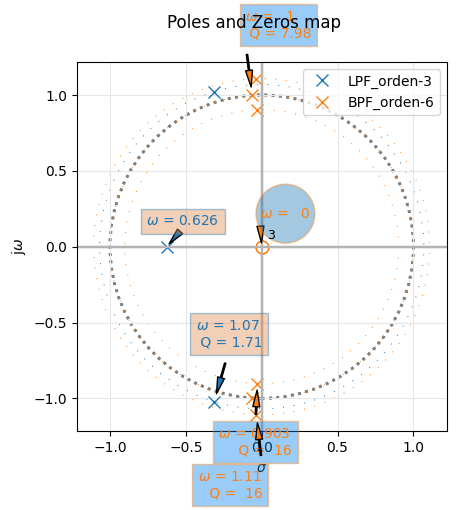

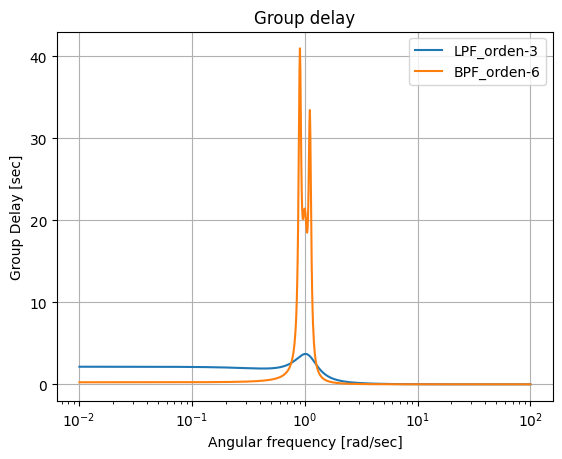

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jun  7 19:27:22 2023

@author: fede23
"""

# Modulos:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

# esto dejarlo así, no tocar, es para graficar
all_sys = []
filter_names = []

#%% Valores de la plantilla de diseño y parametros %%#

# Valores plantilla de diseño Filtro Pasa Banda (objetivo):
alpha_max = 0.5
alpha_min = 24

Q = 5
wo = 1 # frecuencia central banda de paso (normalizada)
wp1 = 0.9
wp2 = 1.1
ws1 = 17/22
ws2 = 18/11

# Valores plantilla de diseño Filtro Pasa Bajos (prototipo):
omega_p = 1
omega_s = Q * ((ws1**2 - 1)/ws1)

#%% Desarrollo %%#

bw = wo/Q
ee = (10**(alpha_max/10) - 1) # epsilon²
e = np.sqrt(ee) # epsilon
n = 3

#%% Transferencia LPF Chebyshev
# obtengo ceros, polos y ganancia de un Cheby de orden n
z1,p1,k1 = sig.cheb1ap(n, alpha_max) 
# obtengo num y denum correspondiente a los z,p,k anteriores
num1, den1 = sig.zpk2tf(z1,p1,k1)

# transferencia del LPF Butter
tf1 = sig.TransferFunction( num1, den1 )
all_sys.append(tf1)
# label1 = 'LPF-Butterworth' + '_orden-' + str(n) + '_ripple_' + str(alpha_max) + 'dB' # etiqueta
label1 = 'LPF' + '_orden-' + str(n) # etiqueta
print_subtitle(label1)
# factorizamos en SOS's
sos1 = tf2sos_analog(num1, den1)
pretty_print_SOS(sos1, mode='omegayq')
filter_names.append(label1)

#%% Transferencia BPF Chebyshev %%#

# Función a utilizar: scipy.signal.lp2bp(b, a, wo=1.0, bw=1.0)
num2, den2 = sig.lp2bp(num1, den1, wo, bw)
# Obtengo z,p,k de la transferencia en MP finalmente
z2,p2,k2 = sig.tf2zpk(num2, den2)
# transferencia HPF Maxima Planicidad
tf2 = sig.TransferFunction( num2, den2 ) # Función transferencia
all_sys.append(tf2)
# label2 = 'BPF-Butterworth' + '_orden-' + str(2*n) + '_ripple_' + str(alpha_max) + 'dB' # etiqueta
label2 = 'BPF' + '_orden-' + str(2*n) # etiqueta
print_subtitle(label1)
# factorizamos en SOS's
sos2 = tf2sos_analog(num2, den2)
pretty_print_SOS(sos2, mode='omegayq')
pretty_print_SOS(sos2)
filter_names.append(label2)

#%% Singularidades %%#

#print(f'denominador etapa 1: S² + {-2*p_real1}*S + {w0_etapa1**2}')
print('Singularidades LPF Butterwoth')
print(f'Polos: {p1}')
print(f'Ceros: {z1}')

print('Singularidades BPF Butterworth')
print(f'Polos: {p2}')
print(f'Ceros: {z2}')

plt.close('all') # cierro todo antes de graficar nuevamente por las dudas
analyze_sys( all_sys, filter_names)
